# I] Import + user-defined variables

In [20]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

## functions & options


In [22]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [23]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Dataframe download and settings

In [24]:
%%time
# DL data GABARAP isoform expression
path = output_file_directory + "/GABARAP/dataframes_for_input/df_GABARAP_NormPrim.csv"
df_GABARAP_NormPrim= pandas.read_csv(path, sep = ",")

df_GABARAP_NormPrim = df_GABARAP_NormPrim.rename(columns = {'GABARAP_total' : 'GABARAP_all_tpm', 
                                                            'GABARAP_1tpm': 'GABARAP_tpm',
                                                            'GABARAP_2tpm' : "GABARAP-a_tpm",
                                                            'GABARAP_3tpm' : "GABARAP-b_tpm"})

#Add columns, normalized on total
df_GABARAP_NormPrim = df_GABARAP_NormPrim.assign(GABARAP_1lognorm= df_GABARAP_NormPrim['GABARAP_1']/df_GABARAP_NormPrim["GABARAP"],
                                                 GABARAP_2lognorm= df_GABARAP_NormPrim['GABARAP_2']/df_GABARAP_NormPrim["GABARAP"],
                                                 GABARAP_3lognorm= df_GABARAP_NormPrim['GABARAP_3']/df_GABARAP_NormPrim["GABARAP"])

print(df_GABARAP_NormPrim.shape)
df_GABARAP_NormPrim.head(2)

(16614, 25)
Wall time: 96.7 ms


,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP_all_tpm,GABARAP_tpm,GABARAP-a_tpm,...,GABARAP_prot_tot,GABARAP_1perc,GABARAP_2perc,GABARAP_3perc,GABARAP_1norm,GABARAP_2norm,GABARAP_3norm,GABARAP_1lognorm,GABARAP_2lognorm,GABARAP_3lognorm
0,GTEX-OIZI-0005-SM-2XCED,Normal Tissue,Blood,11.27,7.823,9.316,10.4,2469.493431,226.441351,637.374609,...,2214.991061,10.223127,28.775493,61.001379,0.091695,0.258099,0.547147,0.694144,0.826619,0.922804
1,GTEX-XAJ8-0006-SM-46MVM,Normal Tissue,Blood,11.24,6.587,9.797,10.4,2418.671971,96.134675,889.590998,...,2336.900774,4.113768,38.067128,57.819105,0.039747,0.367801,0.558643,0.586032,0.871619,0.925267


In [25]:
#split to have Normal (GTEX) and Primary (TCGA)
df_GABARAP_Normal = df_GABARAP_NormPrim[df_GABARAP_NormPrim['sample'].str.startswith('GTEX')]
print(len(df_GABARAP_Normal))
df_GABARAP_Primary = df_GABARAP_NormPrim[df_GABARAP_NormPrim['sample'].str.startswith('TCGA')]
print(len(df_GABARAP_Primary))

7429
9185


# III] GABARAP expression

In [26]:
# df with only Normal and percentage
df_sampletype= df_GABARAP_Normal[['Primary_Site',
                               'GABARAP_prot_tot',             
                               'GABARAP_1perc',
                               'GABARAP_2perc',
                               'GABARAP_3perc']]

df_sampletype = df_sampletype.assign(GABARAP_3perc = df_sampletype['GABARAP_3perc'].abs(),
                                     GABARAP_2perc = df_sampletype['GABARAP_2perc'].abs())
#Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'GABARAP_total': 'tpm GABARAP(all)',
                                                'GABARAP_1perc' : "% GABARAP",
                                                'GABARAP_2perc' : "% GABARAP-a",
                                                'GABARAP_3perc' : "% GABARAP-b"})

#Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)

df_sampletype.head()

,GABARAP_prot_tot,% GABARAP,% GABARAP-a,% GABARAP-b
Primary Site,,,,
Adipose Tissue,579.529344,4.265457,33.489448,62.245095
Adrenal Gland,668.381215,3.215042,28.714365,68.070594
Bladder,575.418506,3.911816,35.536096,60.552088
Blood,781.812451,4.378653,36.720844,58.900503
Blood Vessel,734.472345,4.449757,34.702829,60.847414


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


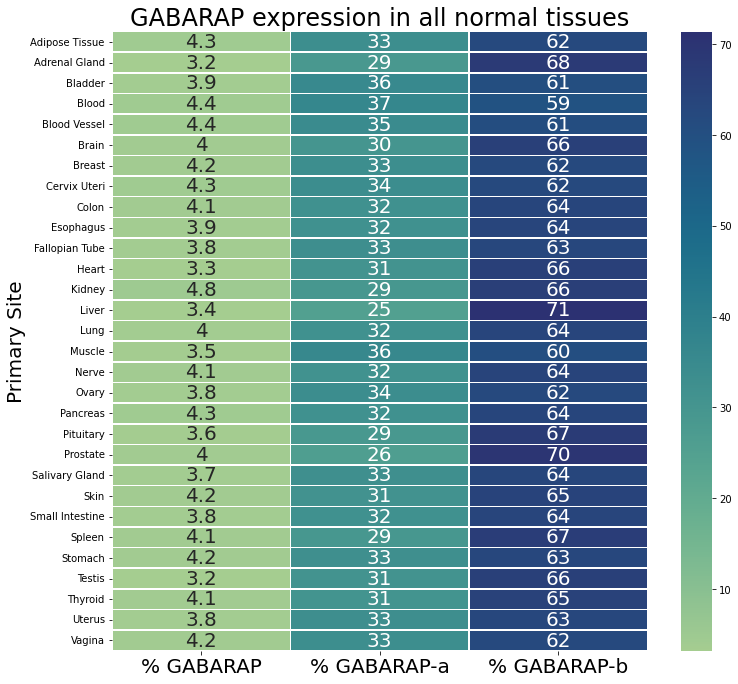

In [27]:
HeatMap_df_sampletype = df_sampletype[['% GABARAP', '% GABARAP-a', '% GABARAP-b']]
heatmap = seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="crest", linewidths=.5)
plt.title('GABARAP expression in all normal tissues')
plt.subplots_adjust(top=1.2)

path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'heatmap_organs.svg')

In [31]:
# df with only Normal 
hist_df_sampletype = df_sampletype.reset_index()
hist_df_sampletype = hist_df_sampletype[['Primary Site','GABARAP_prot_tot']]
hist_df_sampletype.head()

,Primary Site,GABARAP_prot_tot
0,Adipose Tissue,579.529344
1,Adrenal Gland,668.381215
2,Bladder,575.418506
3,Blood,781.812451
4,Blood Vessel,734.472345


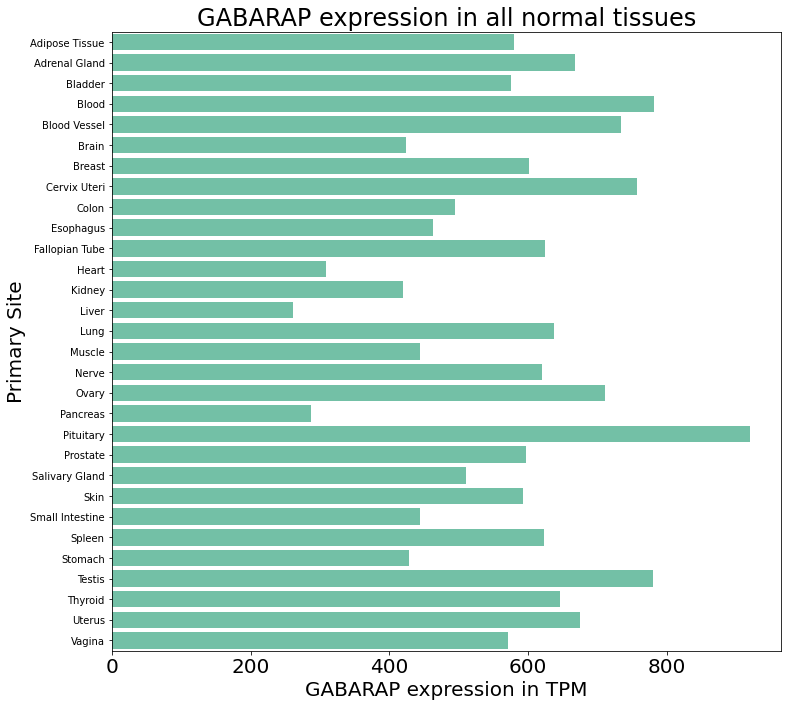

In [33]:
# Seaborn
seaborn.barplot(data = hist_df_sampletype, x =  'GABARAP_prot_tot', y = 'Primary Site', color = 'mediumaquamarine')
plt.title('GABARAP expression in all normal tissues')
plt.xlabel('GABARAP expression in TPM')
plt.subplots_adjust(top=1.2)

path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'barplot_tpm.svg')

## A) Distribution

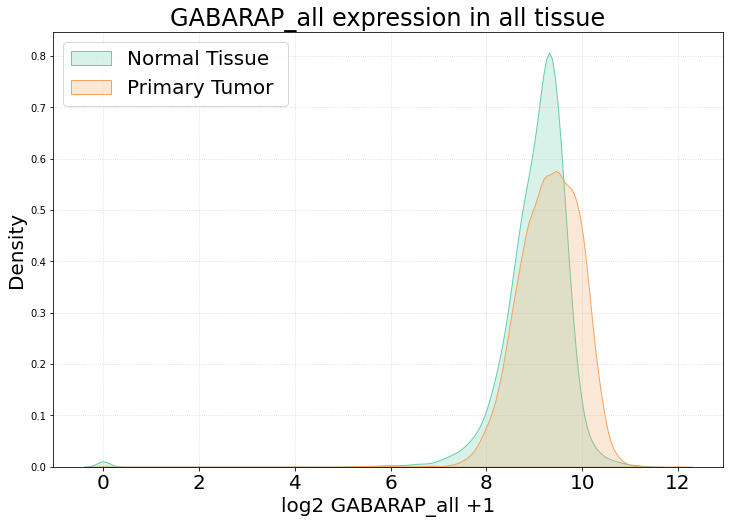

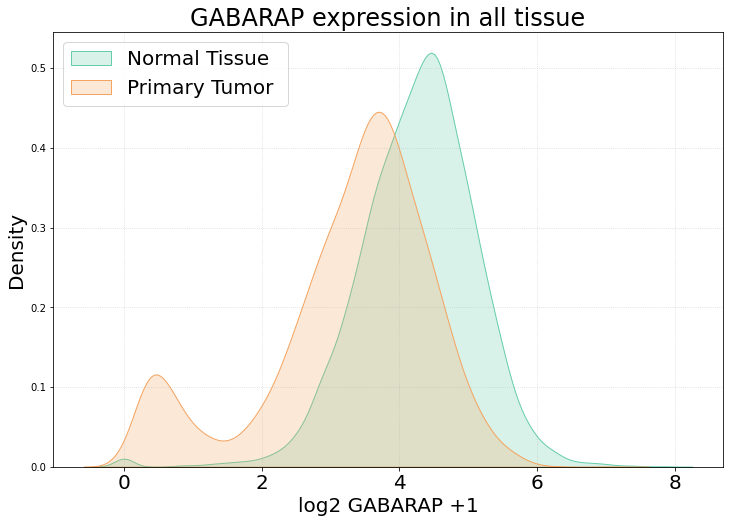

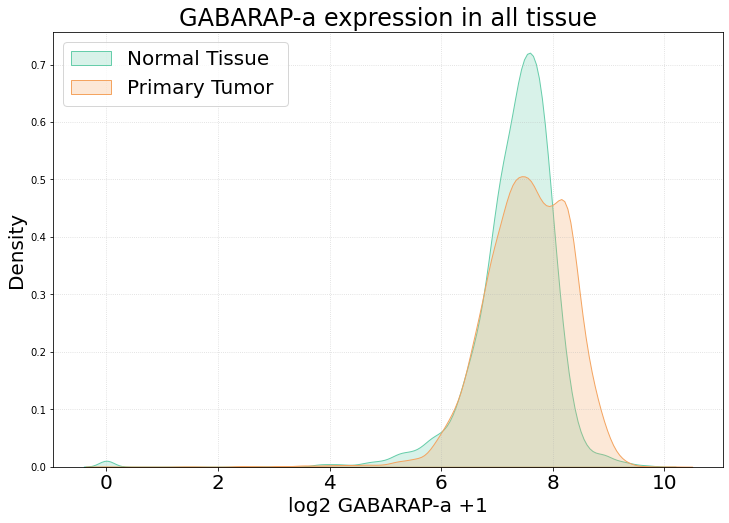

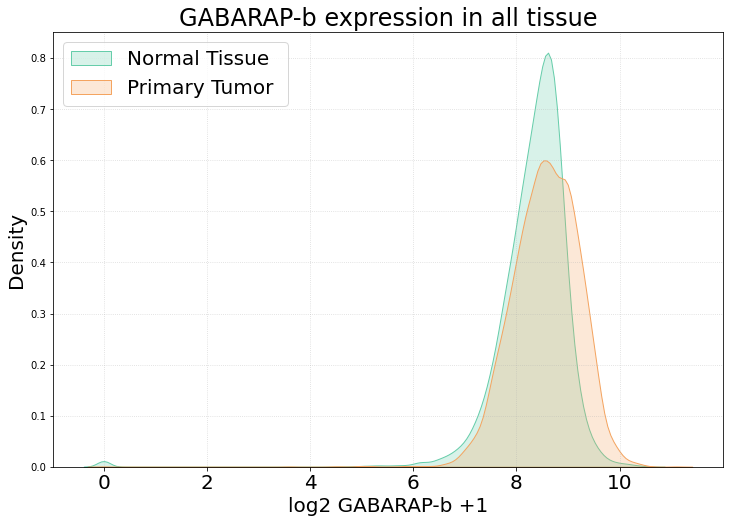

<Figure size 864x576 with 0 Axes>

In [35]:
# Distribution graph, for GABARAP, iso1 & iso2

all_dfs = [[df_GABARAP_Normal, 'in all tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = [['log2_p1_GABARAP_total', 'GABARAP_all'], 
            ['log2_p1_GABARAP_1', 'GABARAP'], 
            ['log2_p1_GABARAP_2', 'GABARAP-a'],
            ['log2_p1_GABARAP_3', 'GABARAP-b']]

for df in all_dfs:
  for isoform in isoforms:
    xData = df[0][isoform[0]]
    x2Data = df[2][isoform[0]]

    seaborn.kdeplot(xData, color = 'mediumaquamarine', fill = True)
    seaborn.kdeplot(x2Data, color = 'sandybrown', fill = True)

    plt.xlabel('log2 '+ isoform[1]+ ' +1')
    plt.title(isoform[1]+ ' expression ' + df[1] )
    plt.legend(labels=["Normal Tissue","Primary Tumor "], loc='upper left')
    plt.grid(ls=':', alpha=0.5)
    plt.show()
    plt.clf()

## B) Percentage do not express GABARAP isoforms

In [36]:
#Percentage of patients: 
all_dfs = [[df_GABARAP_Normal, 'all normal tissue'], [df_GABARAP_Primary, 'all primary tumor']]

isoforms = [['GABARAP_all_tpm', 'GABARAP(all)'], ['GABARAP_tpm', 'GABARAP'], 
            ['GABARAP-a_tpm', 'GABARAP-a'], ['GABARAP-b_tpm', 'GABARAP-b']]

for df in all_dfs:
  print(df[1])
  for isoform in isoforms:
        
    what = isoform[1]
    all = (df[0][isoform[0]]).shape
    no_exp = (df[0][isoform[0]]<0.1).sum()
    perc_no_exp = (no_exp*100)/all
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'% of tumor do not express', what)
  print()


all normal tissue
0.4 % of tumor do not express GABARAP(all)
0.4 % of tumor do not express GABARAP
0.4 % of tumor do not express GABARAP-a
0.4 % of tumor do not express GABARAP-b

all primary tumor
0.0 % of tumor do not express GABARAP(all)
0.5 % of tumor do not express GABARAP
0.0 % of tumor do not express GABARAP-a
0.0 % of tumor do not express GABARAP-b



In [37]:
#Percentage of patients: 
all_dfs = [[df_GABARAP_Normal, 'all normal tissue'], [df_GABARAP_Primary, 'all primary tumor']]

isoforms = [['GABARAP_all_tpm', 'GABARAP(all)'], ['GABARAP_tpm', 'GABARAP'], 
            ['GABARAP-a_tpm', 'GABARAP-a'], ['GABARAP-b_tpm', 'GABARAP-b']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save what isoform
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib

,Isoforms,who_dontexp,Percentage,Sample_Type
0,GABARAP(all),27,0.4,all normal tissue
1,GABARAP,27,0.4,all normal tissue
2,GABARAP-a,27,0.4,all normal tissue
3,GABARAP-b,27,0.4,all normal tissue
4,GABARAP(all),1,0,all primary tumor
5,GABARAP,50,0.5,all primary tumor
6,GABARAP-a,1,0,all primary tumor
7,GABARAP-b,1,0,all primary tumor


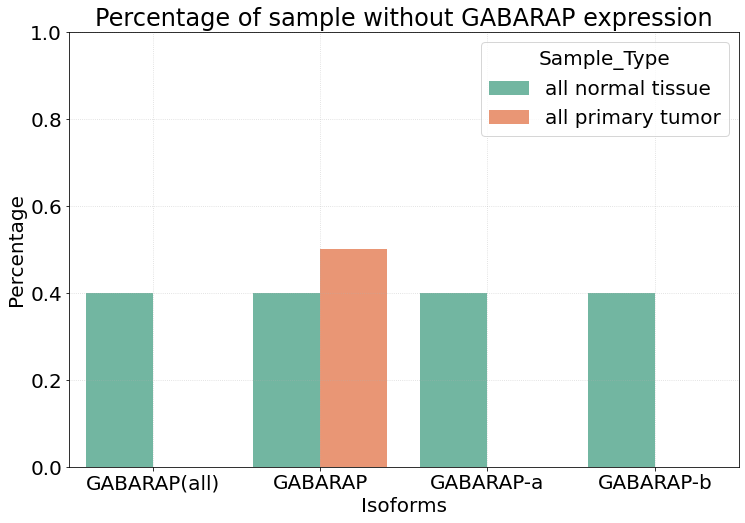

In [38]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", hue="Sample_Type", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without GABARAP expression")
plt.yticks(fontsize=20)
plt.grid(ls=':', alpha=0.5)
plt.ylim(0,1)

path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'percentage_expression.svg')

## C) Expression figures

### 1) Value TPM

In [39]:
df_GABARAP_NormPrim.iloc[:,3:7]

,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3
0,11.270,7.823,9.316,10.400
1,11.240,6.587,9.797,10.400
2,11.180,6.138,9.749,10.360
3,11.170,6.901,9.374,10.490
4,11.080,6.793,9.684,10.150
...,...,...,...,...
16609,5.370,-2.315,2.428,5.116
16610,5.194,-1.966,3.458,4.530
16611,4.966,-3.108,3.050,4.389
16612,3.998,-2.680,2.133,3.475


16614


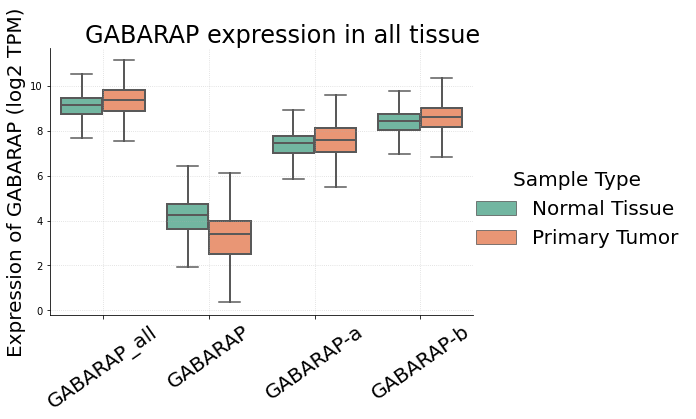

In [41]:
# Distribution: Data preparation + graph
Data = df_GABARAP_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(3,7)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for GABARAP/iso1/iso2/iso3                            
data_distrib.loc[:shape,'x'] = 'GABARAP_all'
data_distrib.loc[shape: shape*2,'x'] = 'GABARAP'
data_distrib.loc[shape*2:shape*3,'x'] = 'GABARAP-a'
data_distrib.loc[shape*3:,'x'] = 'GABARAP-b'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.45, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.grid(ls=':', alpha=0.5)
plt.ylabel('Expression of GABARAP (log2 TPM)')
plt.xlabel('')
plt.xticks(rotation = 35)
plt.title('GABARAP expression in '+ info, x=.55)

#save
path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'GABARAP_exp_alltissue.svg')

In [42]:
#Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP', 'GABARAP_1', 'GABARAP_2', 'GABARAP_3']

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


the pvalue between all normal tissue(9.148) and all primary tumors(9.347) for GABARAP is 8.568E-145
the pvalue between all normal tissue(4.236) and all primary tumors(3.386) for GABARAP_1 is 0.000E+00
the pvalue between all normal tissue(7.427) and all primary tumors(7.563) for GABARAP_2 is 1.065E-70
the pvalue between all normal tissue(8.423) and all primary tumors(8.583) for GABARAP_3 is 9.297E-107



In [43]:
#median brut file to compare 
print(df_GABARAP_NormPrim['GABARAP'].mean())
print(df_GABARAP_NormPrim['GABARAP_1'].mean())
print(df_GABARAP_NormPrim['GABARAP_2'].mean())
print(df_GABARAP_NormPrim['GABARAP_3'].mean())

9.16469832671241
3.4693934994582385
7.410101583002302
8.431070181774414


### 2) Normalized

In [44]:
df_GABARAP_NormPrim.iloc[:,19:22]

,GABARAP_1norm,GABARAP_2norm,GABARAP_3norm
0,0.091695,0.258099,0.547147
1,0.039747,0.367801,0.558643
2,0.030353,0.370873,0.566442
3,0.051868,0.287972,0.624165
4,0.051225,0.379981,0.524858
...,...,...,...
16609,0.004835,0.130107,0.838564
16610,0.006965,0.300182,0.631116
16611,0.003679,0.264965,0.670346
16612,0.009704,0.274478,0.695904


In [45]:
len(df_GABARAP_NormPrim.columns)

25

In [46]:
# Distribution: Data preparation + graph
df_GABARAP_NormPrim.iloc[:,22:25].head(2)

,GABARAP_1lognorm,GABARAP_2lognorm,GABARAP_3lognorm
0,0.694144,0.826619,0.922804
1,0.586032,0.871619,0.925267


16614


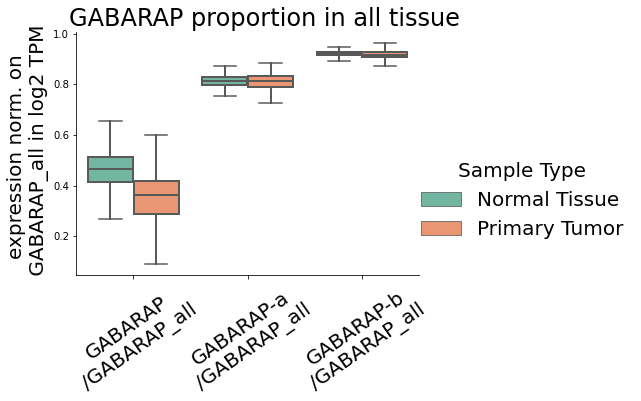

In [47]:
# NORMALiZED Distribution: Data preparation + graph
# Distribution: Data preparation + graph
Data = df_GABARAP_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(22,25)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for GABARAP/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'GABARAP\n/GABARAP_all'
data_distrib.loc[shape: shape*2,'x'] = 'GABARAP-a\n/GABARAP_all'
data_distrib.loc[shape*2:,'x'] = 'GABARAP-b\n/GABARAP_all'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('expression norm. on \n GABARAP_all in log2 TPM')
plt.xlabel('')
plt.title('GABARAP proportion in '+ info, x=0.55)
plt.xticks(rotation = 35)

#save graph
path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'prop_alltissue.svg')

In [ ]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP_1lognorm', 'GABARAP_2lognorm', 'GABARAP_3lognorm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


In [ ]:
#same but tpm!

16614


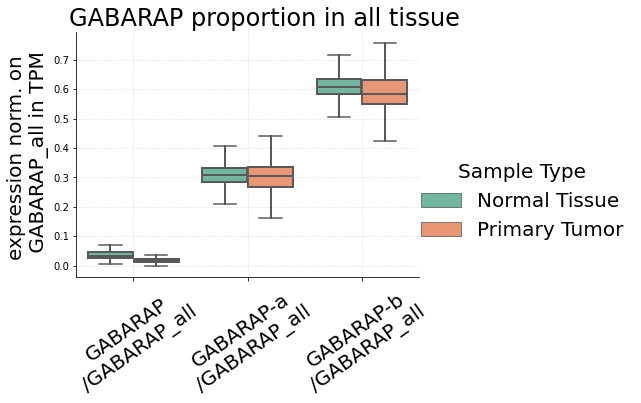

In [50]:
# NORMALiZED Distribution: Data preparation + graph
# Distribution: Data preparation + graph
Data = df_GABARAP_NormPrim
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_type = {'sample_type':[Data.iloc[:,1][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_typedf = pandas.DataFrame(sample_type)
sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,sample_typedf])
sample_typedf.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(19,22)
    for i in range(0, shape)]}


#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for GABARAP/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'GABARAP\n/GABARAP_all'
data_distrib.loc[shape: shape*2,'x'] = 'GABARAP-a\n/GABARAP_all'
data_distrib.loc[shape*2:,'x'] = 'GABARAP-b\n/GABARAP_all'

# Will be used for Hue
data_distrib['Sample Type'] = sample_typedf['sample_type']

#graph
seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('expression norm. on \n GABARAP_all in TPM')
plt.xlabel('')
plt.title('GABARAP proportion in '+ info, x=0.55)
plt.xticks(rotation = 35)
plt.grid(ls=':', alpha=0.5)

#save graph
path = 'GABARAP/figs_GABARAP_characterisation/'
plt.savefig(output_file_directory+path+'prop_alltissue.svg')

In [51]:
#NORMALIZED Distribution: Stats for all 

all_dfs = [[df_GABARAP_Normal, 'all normal tissue', df_GABARAP_Primary, 'all primary tumors']]

isoforms = ['GABARAP_1norm', 'GABARAP_2norm', 'GABARAP_3norm']
print('NORMALIZED')

for df in all_dfs:
  for isoform in isoforms:

    n1 = "{:.3f}".format(numpy.median(df[0][isoform]))
    n2 = "{:.3f}".format(numpy.median(df[2][isoform]))

    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df[0][isoform], df[2][isoform])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between", df[1]+'('+n1+')', "and", df[3]+'('+n2+')', "for", isoform, 'is', Pvalue)
  print()


NORMALIZED
the pvalue between all normal tissue(0.034) and all primary tumors(0.016) for GABARAP_1norm is 0.000E+00
the pvalue between all normal tissue(0.309) and all primary tumors(0.305) for GABARAP_2norm is 2.153E-10
the pvalue between all normal tissue(0.609) and all primary tumors(0.584) for GABARAP_3norm is 4.617E-144



## D) Correlation between the two isoforms

In [64]:
df_GABARAP_Primary[df_GABARAP_Primary['GABARAP_tpm'] > 55 ]

,sample,Sample_Type,Primary_Site,GABARAP,GABARAP_1,GABARAP_2,GABARAP_3,GABARAP_all_tpm,GABARAP_tpm,GABARAP-a_tpm,...,GABARAP_prot_tot,GABARAP_1perc,GABARAP_2perc,GABARAP_3perc,GABARAP_1norm,GABARAP_2norm,GABARAP_3norm,GABARAP_1lognorm,GABARAP_2lognorm,GABARAP_3lognorm
7429,TCGA-AJ-A2QM-01,Primary Tumor,Endometrium,11.990,7.026,10.130,11.100,4067.705861,130.326706,1120.555750,...,3445.873507,3.782109,32.518772,63.699119,0.032039,0.275476,0.539614,0.585988,0.844871,0.925771
7460,TCGA-DH-A66B-01,Primary Tumor,Brain,10.710,5.862,9.074,9.741,1675.062416,58.160799,538.946151,...,1452.828917,4.003279,37.096326,58.900395,0.034722,0.321747,0.510860,0.547339,0.847246,0.909524
7499,TCGA-FC-A5OB-01,Primary Tumor,Prostate,10.570,5.827,8.690,9.688,1520.151136,56.766764,412.999581,...,1294.622218,4.384813,31.901166,63.714021,0.037343,0.271683,0.542614,0.551277,0.822138,0.916556
7557,TCGA-HT-A61B-01,Primary Tumor,Brain,10.460,6.124,8.441,9.567,1408.553822,69.743135,347.530515,...,1175.769827,5.931700,29.557700,64.510601,0.049514,0.246729,0.538493,0.585468,0.806979,0.914627
7574,TCGA-B9-A5W9-01,Primary Tumor,Kidney,10.440,5.799,8.682,9.422,1389.161831,55.675631,410.715757,...,1152.359592,4.831446,35.641284,59.527270,0.040079,0.295657,0.493800,0.555460,0.831609,0.902490
7600,TCGA-DX-A1KY-01,Primary Tumor,"Soft Tissue,Bone",10.420,5.818,8.808,9.303,1370.036816,56.413730,448.199361,...,1136.270162,4.964817,39.444788,55.590395,0.041177,0.327144,0.461051,0.558349,0.845298,0.892802
7828,TCGA-ET-A39K-01,Primary Tumor,Thyroid Gland,10.270,5.823,8.047,9.562,1234.746216,56.609588,264.476283,...,1076.957847,5.256435,24.557719,70.185846,0.045847,0.214195,0.612168,0.566991,0.783544,0.931061
7883,TCGA-HT-A618-01,Primary Tumor,Brain,10.240,5.799,8.498,9.182,1209.335485,55.675631,361.536128,...,998.051966,5.578430,36.224179,58.197391,0.046038,0.298954,0.480297,0.566309,0.829883,0.896680
7905,TCGA-EM-A2CJ-01,Primary Tumor,Thyroid Gland,10.230,6.065,8.311,9.311,1200.981988,66.948436,317.584228,...,1019.702121,6.565490,31.144804,62.289706,0.055745,0.264437,0.528875,0.592864,0.812414,0.910166
8219,TCGA-DJ-A13S-01,Primary Tumor,Thyroid Gland,10.120,5.830,8.359,9.105,1112.815499,56.884932,328.328370,...,935.865430,6.078324,35.082861,58.838815,0.051118,0.295043,0.494828,0.576087,0.825988,0.899704


primary
shape: (9185, 25)
shape after removing extrem dots: (8587, 25)

normal
shape: (7429, 25)
shape after removing extrem dots: (7247, 25)
The correlation between iso1 and iso2 in normal tissues is: 0.5641693420187184 0.0


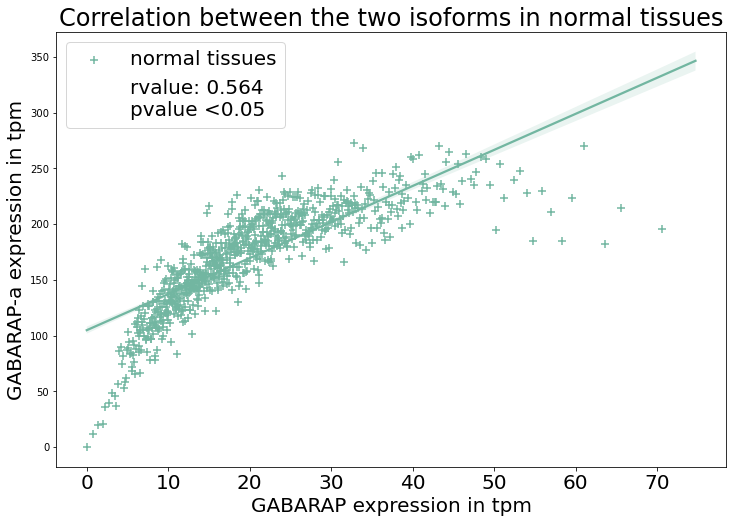

The correlation between iso1 and iso3 in normal tissues is: 0.5964040414530661 0.0


In [ ]:
#isoform correlation in all tissue 
color1 = '#72B6A1'
color2 = '#e99675'

#remove extremities
df_GABARAP_Primary2 = df_GABARAP_Primary[df_GABARAP_Primary['GABARAP_tpm'] < 55 ]
df_GABARAP_Primary2 = df_GABARAP_Primary2[df_GABARAP_Primary2['GABARAP-a_tpm'] < 400 ]
df_GABARAP_Primary2 = df_GABARAP_Primary2[df_GABARAP_Primary2['GABARAP-b_tpm'] < 800 ]

print('primary')
print("shape:",df_GABARAP_Primary.shape)
print("shape after removing extrem dots:",df_GABARAP_Primary2.shape)
print()
df_GABARAP_Normal2 = df_GABARAP_Normal[df_GABARAP_Normal['GABARAP_tpm'] < 75 ]
df_GABARAP_Normal2 = df_GABARAP_Normal2[df_GABARAP_Normal2['GABARAP-a_tpm'] < 350 ]
df_GABARAP_Normal2 = df_GABARAP_Normal2[df_GABARAP_Normal2['GABARAP-b_tpm'] < 900 ]

print('normal')
print("shape:",df_GABARAP_Normal.shape)
print("shape after removing extrem dots:",df_GABARAP_Normal2.shape)

tissues = [[df_GABARAP_Normal2, "normal tissues", color1], 
           [df_GABARAP_Primary2, "primary tumors", color2]]

for tissue in tissues: 
  x = tissue[0]['GABARAP_tpm'].to_list()
  y = tissue[0]['GABARAP-a_tpm'].to_list()
  z = tissue[0]['GABARAP-b_tpm'].to_list()

  r_value, p_value = scipy.stats.pearsonr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP expression in tpm")
  plt.ylabel('GABARAP-a expression in tpm')
  plt.show()
  plt.clf()

  r_value, p_value = scipy.stats.pearsonr(x, z)
  print("The correlation between iso1 and iso3 in",tissue[1],"is:", r_value, p_value)
    
  seaborn.regplot(x=x,y=z, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP expression in tpm")
  plt.ylabel('GABARAP-b expression in tpm')
  plt.show()
  plt.clf()
  print()
    
  r_value, p_value = scipy.stats.pearsonr(y, z)
  print("The correlation between iso1 and iso3 in",tissue[1],"is:", r_value, p_value)
    
  seaborn.regplot(x=y,y=z, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP-a expression in tpm")
  plt.ylabel('GABARAP-b expression in tpm')
  plt.show()
  plt.clf()
  print()


primary
shape: (9185, 25)
shape after removing extrem dots: (3863, 25)

normal
shape: (7429, 25)
shape after removing extrem dots: (7238, 25)
The correlation between iso1 and iso2 in normal tissues is: 0.5910871407981924 0.0


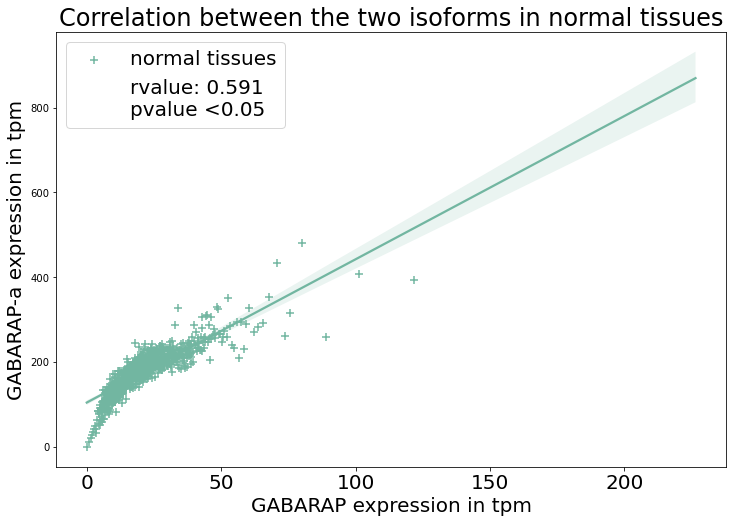

The correlation between iso1 and iso3 in normal tissues is: 0.6279118716554318 0.0


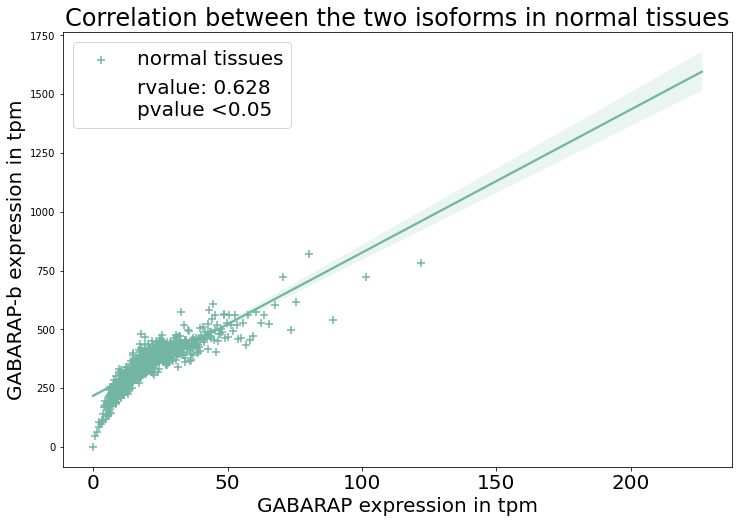


The correlation between iso1 and iso3 in normal tissues is: 0.8977933908670354 0.0


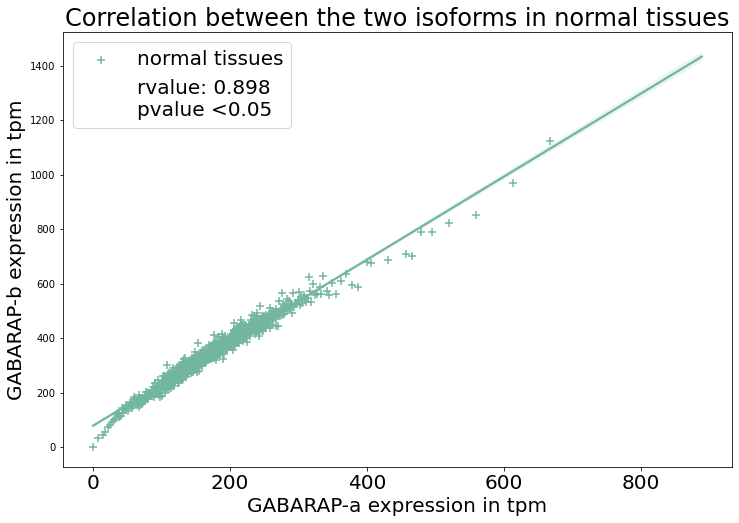


The correlation between iso1 and iso2 in primary tumors is: 0.6271468698179224 0.0


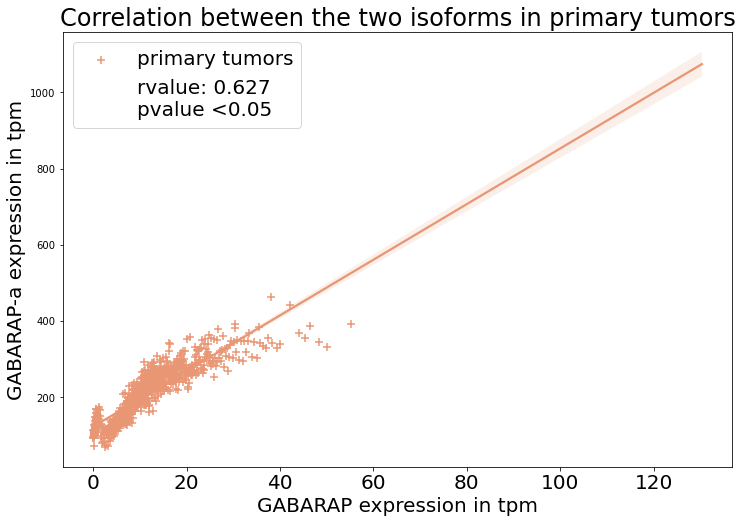

The correlation between iso1 and iso3 in primary tumors is: 0.5419486324150988 0.0


KeyboardInterrupt: 

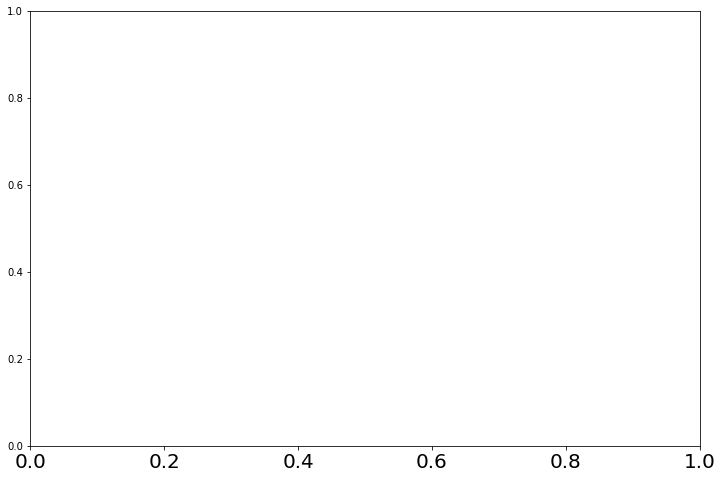

In [82]:
#isoform correlation in all tissue 
color1 = '#72B6A1'
color2 = '#e99675'

#remove extremities
df_GABARAP_Primary2 = df_GABARAP_Primary[df_GABARAP_Primary['GABARAP_tpm'] < 55 ]
df_GABARAP_Primary2 = df_GABARAP_Primary2[df_GABARAP_Primary2['GABARAP-b_tpm'] < 350 ]
df_GABARAP_Primary2 = df_GABARAP_Primary2[df_GABARAP_Primary2['GABARAP-b_tpm'] < 850 ]

print('primary')
print("shape:",df_GABARAP_Primary.shape)
print("shape after removing extrem dots:",df_GABARAP_Primary2.shape)
print()
df_GABARAP_Normal2 = df_GABARAP_Normal[df_GABARAP_Normal['GABARAP_tpm'] < 90 ]
df_GABARAP_Normal2 = df_GABARAP_Normal2[df_GABARAP_Normal2['GABARAP-a_tpm'] < 350 ]
df_GABARAP_Normal2 = df_GABARAP_Normal2[df_GABARAP_Normal2['GABARAP-b_tpm'] < 700 ]

print('normal')
print("shape:",df_GABARAP_Normal.shape)
print("shape after removing extrem dots:",df_GABARAP_Normal2.shape)

tissues = [[df_GABARAP_Normal, "normal tissues", color1], 
           [df_GABARAP_Primary, "primary tumors", color2]]

for tissue in tissues: 
  x = tissue[0]['GABARAP_tpm'].to_list()
  y = tissue[0]['GABARAP-a_tpm'].to_list()
  z = tissue[0]['GABARAP-b_tpm'].to_list()

  r_value, p_value = scipy.stats.pearsonr(x, y)
  print("The correlation between iso1 and iso2 in",tissue[1],"is:", r_value, p_value)

  seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP expression in tpm")
  plt.ylabel('GABARAP-a expression in tpm')
  plt.show()
  plt.clf()

  r_value, p_value = scipy.stats.pearsonr(x, z)
  print("The correlation between iso1 and iso3 in",tissue[1],"is:", r_value, p_value)
    
  seaborn.regplot(x=x,y=z, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP expression in tpm")
  plt.ylabel('GABARAP-b expression in tpm')
  plt.show()
  plt.clf()
  print()
    
  r_value, p_value = scipy.stats.pearsonr(y, z)
  print("The correlation between iso1 and iso3 in",tissue[1],"is:", r_value, p_value)
    
  seaborn.regplot(x=y,y=z, x_bins=800, x_ci = 0, marker="+", label = tissue[1], color = tissue[2])
  seaborn.regplot(x=[],y=[], marker=" ", label= 'rvalue: '+str(round(r_value,3))+ "\npvalue <0.05")

  name = "Correlation between the two isoforms in "+  tissue[1]
  plt.title(name)
  plt.legend()
  plt.xlabel("GABARAP-a expression in tpm")
  plt.ylabel('GABARAP-b expression in tpm')
  plt.show()
  plt.clf()
  print()


In [ ]:
#on log2 ?